# Exploratory Data Analysis - Telco Customer Churn Dataset


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../data/processed", exist_ok=True)
os.makedirs("../figures", exist_ok=True)


In [70]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

In [72]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"])
df = df.drop(columns=["customerID"])
print("Missing values:", df.isnull().sum().sum())
print("Shape after cleaning:", df.shape)


Missing values: 0
Shape after cleaning: (7032, 20)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## Encoding


In [74]:
df_encoded = df.copy()

# Binary label encoding
df_encoded["Churn"]           = df_encoded["Churn"].map({"Yes": 1, "No": 0})
df_encoded["gender"]          = df_encoded["gender"].map({"Male": 1, "Female": 0})
df_encoded["Partner"]         = df_encoded["Partner"].map({"Yes": 1, "No": 0})
df_encoded["Dependents"]      = df_encoded["Dependents"].map({"Yes": 1, "No": 0})
df_encoded["PhoneService"]    = df_encoded["PhoneService"].map({"Yes": 1, "No": 0})
df_encoded["PaperlessBilling"] = df_encoded["PaperlessBilling"].map({"Yes": 1, "No": 0})

# One-hot encode remaining categoricals
cat_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaymentMethod"
]
df_encoded = pd.get_dummies(df_encoded, columns=cat_cols)

# FIX: convert boolean True/False to integer 0/1
df_encoded = df_encoded.astype(int)

df_encoded.to_csv("../data/processed/telco_cleaned_encoded.csv", index=False)
print("Saved encoded data. Shape:", df_encoded.shape)


Saved encoded data. Shape: (7032, 41)


## Exploratory Data Analysis

In [75]:
df[["tenure", "MonthlyCharges", "TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [76]:
print(df["Churn"].value_counts())
print(df["Churn"].value_counts(normalize=True) * 100)


Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


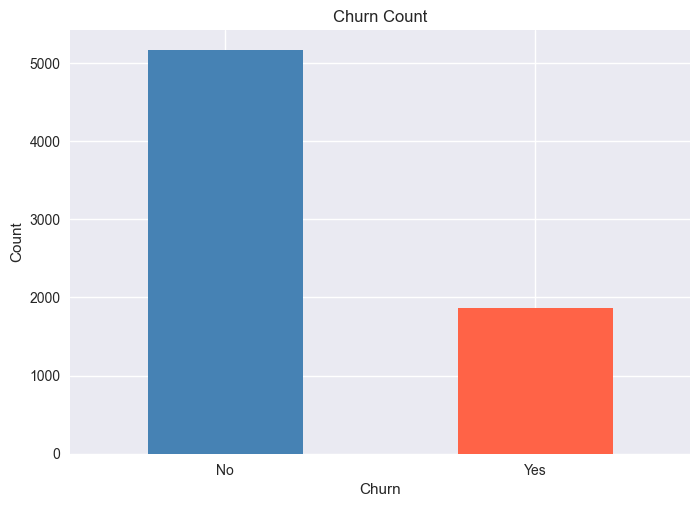

In [77]:
df["Churn"].value_counts().plot(kind="bar", color=["steelblue", "tomato"])
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig("../figures/01_churn_count.png")
plt.show()

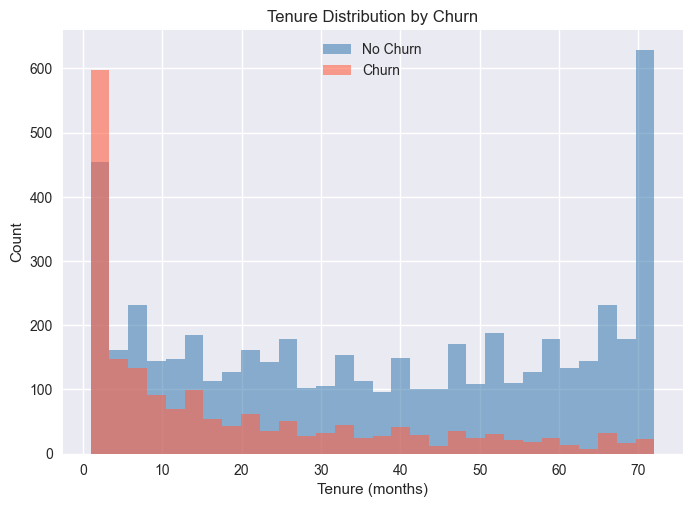

In [78]:
df[df["Churn"] == "No"]["tenure"].hist(alpha=0.6, bins=30, label="No Churn", color="steelblue")
df[df["Churn"] == "Yes"]["tenure"].hist(alpha=0.6, bins=30, label="Churn", color="tomato")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.legend()
plt.savefig("../figures/02_tenure_churn.png")
plt.show()

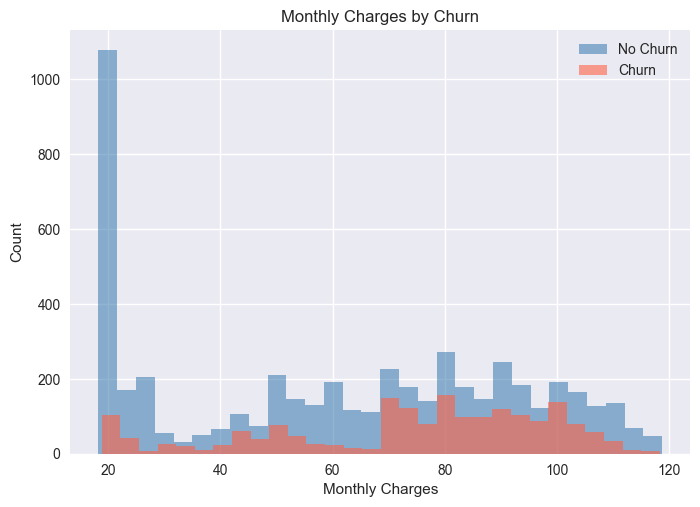

In [79]:
df[df["Churn"] == "No"]["MonthlyCharges"].hist(alpha=0.6, bins=30, label="No Churn", color="steelblue")
df[df["Churn"] == "Yes"]["MonthlyCharges"].hist(alpha=0.6, bins=30, label="Churn", color="tomato")
plt.title("Monthly Charges by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.legend()
plt.savefig("../figures/03_monthly_charges_churn.png")
plt.show()

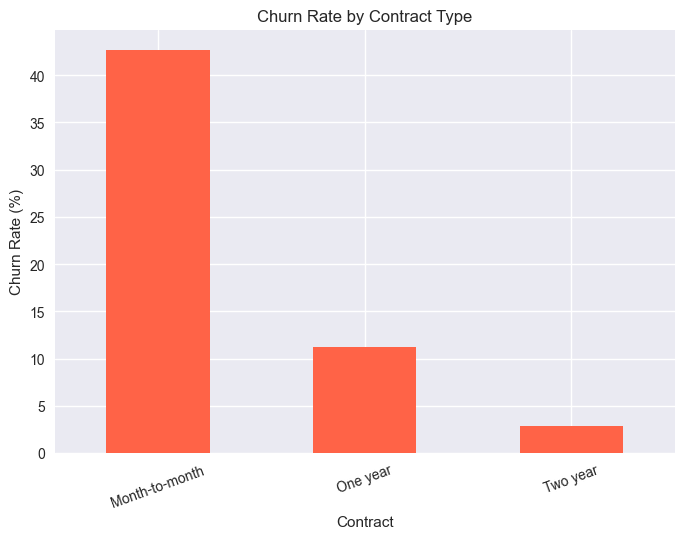

In [80]:
contract_churn = df.groupby("Contract")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)
contract_churn.plot(kind="bar", color="tomato")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=20)
plt.savefig("../figures/04_churn_by_contract.png")
plt.show()

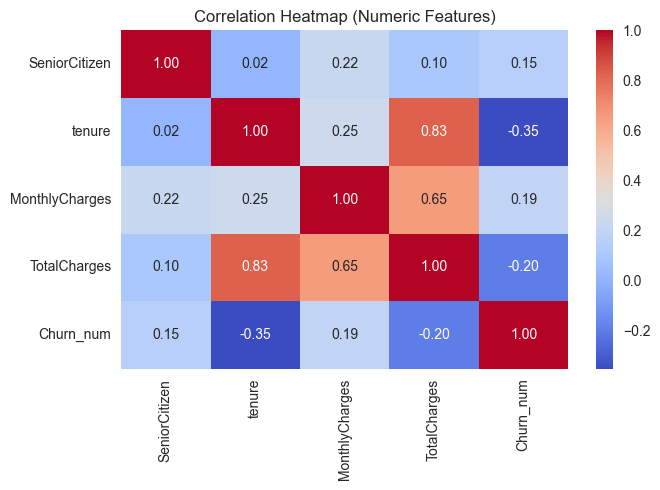

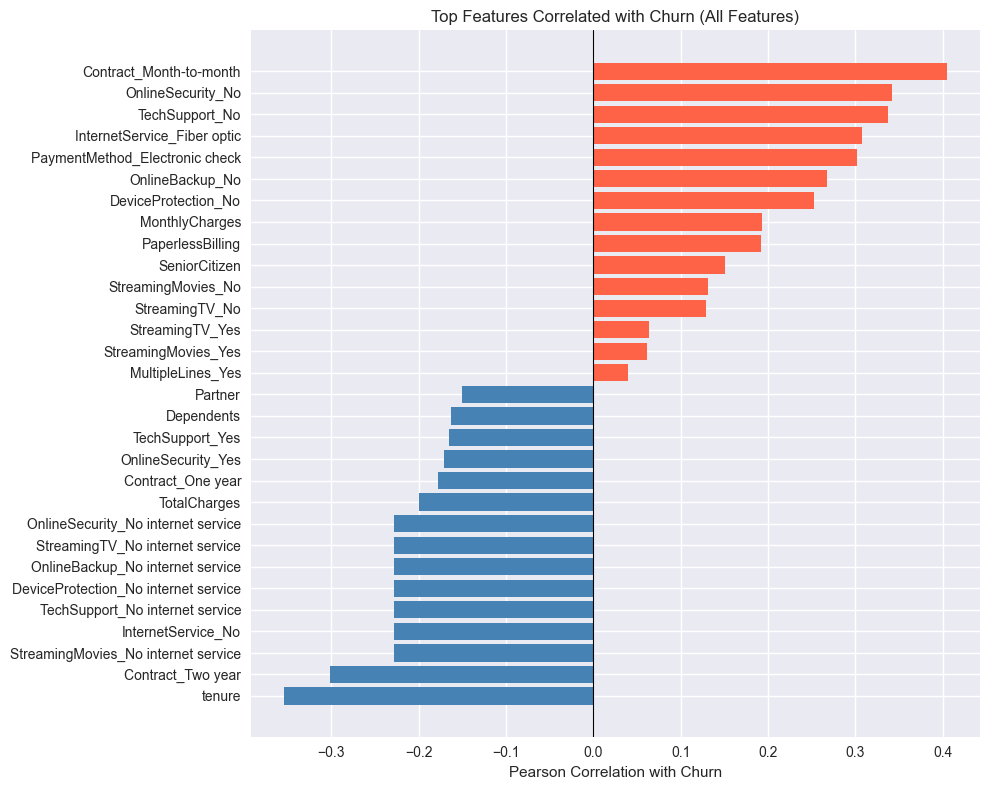


Top 10 features positively correlated with Churn:
SeniorCitizen                     0.151
PaperlessBilling                  0.191
MonthlyCharges                    0.193
DeviceProtection_No               0.252
OnlineBackup_No                   0.268
PaymentMethod_Electronic check    0.301
InternetService_Fiber optic       0.307
TechSupport_No                    0.337
OnlineSecurity_No                 0.342
Contract_Month-to-month           0.405
Name: Churn, dtype: float64

Top 10 features negatively correlated with Churn:
tenure                                 -0.354
Contract_Two year                      -0.302
StreamingMovies_No internet service    -0.228
InternetService_No                     -0.228
TechSupport_No internet service        -0.228
DeviceProtection_No internet service   -0.228
OnlineBackup_No internet service       -0.228
StreamingTV_No internet service        -0.228
OnlineSecurity_No internet service     -0.228
TotalCharges                           -0.199
Name: Chur

In [81]:
import seaborn as sns

# --- Part A: Original heatmap of numeric features only ---
df_corr = df.copy()
df_corr["Churn_num"] = df_corr["Churn"].map({"Yes": 1, "No": 0})

corr = df_corr[["SeniorCitizen", "tenure", "MonthlyCharges",
                 "TotalCharges", "Churn_num"]].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.savefig("../figures/06_correlation_heatmap.png")
plt.show()

# --- Part B: ✅ FIX — Full correlation of ALL features with Churn ---
full_corr = df_encoded.corr()["Churn"].drop("Churn").sort_values()

# Plot top 15 positive and top 15 negative correlations with Churn
top_corr = pd.concat([full_corr.head(15), full_corr.tail(15)])

plt.figure(figsize=(10, 8))
colors = ["tomato" if v > 0 else "steelblue" for v in top_corr.values]
plt.barh(top_corr.index, top_corr.values, color=colors)
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Top Features Correlated with Churn (All Features)")
plt.xlabel("Pearson Correlation with Churn")
plt.tight_layout()
plt.savefig("../figures/06b_full_correlation_with_churn.png")
plt.show()

print("\nTop 10 features positively correlated with Churn:")
print(full_corr.tail(10).round(3))
print("\nTop 10 features negatively correlated with Churn:")
print(full_corr.head(10).round(3))
